<a href="https://colab.research.google.com/github/Balisa50/statistical-data-projects/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read and print the dataset
link ="https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv"
df = pd.read_csv(link)
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.028,14.565,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.800,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014,14.554,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.500,Dark Green,Excellent,591


 # Understanding the data

In [ ]:
# checking shape (# of rows and columns)
df.shape

(9551, 21)

In [ ]:
# details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
# for numerical coulmns
pd.set_option('display.float_format', '{:.3f}'.format) # formatting to 3 dp
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.000,9051128.349,8791521.282,53.000,301962.500,6004089.000,18352291.500,18500652.000
Country Code,9551.000,18.366,56.751,1.000,1.000,1.000,1.000,216.000
Longitude,9551.000,64.127,41.467,-157.948,77.081,77.192,77.282,174.832
Latitude,9551.000,25.854,11.008,-41.330,28.479,28.570,28.643,55.977
Average Cost for two,9551.000,1199.211,16121.183,0.000,250.000,400.000,700.000,800000.000
Price range,9551.000,1.805,0.906,1.000,1.000,2.000,2.000,4.000
Aggregate rating,9551.000,2.666,1.516,0.000,2.500,3.200,3.700,4.900
Votes,9551.000,156.910,430.169,0.000,5.000,31.000,131.000,10934.000


In [ ]:
# for categorical coulmns
df.describe(include=['object']).T

,count,unique,top,freq
Restaurant Name,9551,7446,Cafe Coffee Day,83
City,9551,141,New Delhi,5473
Address,9551,8918,"Dilli Haat, INA, New Delhi",11
Locality,9551,1208,Connaught Place,122
Locality Verbose,9551,1265,"Connaught Place, New Delhi",122
Cuisines,9542,1825,North Indian,936
Currency,9551,12,Indian Rupees(Rs.),8652
Has Table booking,9551,2,No,8393
Has Online delivery,9551,2,No,7100
Is delivering now,9551,2,No,9517


In [ ]:
# checking for missing values in each columns and sorting them
df.isna().sum().sort_values(ascending = False)

,0
Cuisines,9
Restaurant ID,0
Currency,0
Rating text,0
Rating color,0
Aggregate rating,0
Price range,0
Switch to order menu,0
Is delivering now,0
Has Online delivery,0


In [ ]:
# finding the total missing values
df.isna().sum().sum()

9

In [ ]:
# most freq cuisine
df['Cuisines'].mode()[0]

'North Indian'

In [ ]:
df[['Cuisines', 'City']].isnull().sum()

,0
Cuisines,9
City,0


In [ ]:
# filling the missing value spot with the mode
df["Cuisines"].fillna(df['Cuisines'].mode()[0], inplace=True)

<ipython-input-69-e300f3483ac6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cuisines"].fillna(df['Cuisines'].mode()[0], inplace=True)


In [ ]:
df.isna().sum().sum()

0

In [ ]:
# numerical columns
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [ ]:
# categorical columns
cat_cols = df.select_dtypes(['object', 'category']).columns
cat_cols

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [ ]:
# top 10  cuisines
df['Cuisines'].str.split(',').explode().str.strip().value_counts().head(10) # I separated the values

,count
Cuisines,
North Indian,3969
Chinese,2735
Fast Food,1986
Mughlai,995
Italian,764
Bakery,745
Continental,736
Cafe,703
Desserts,653


<ipython-input-90-1fdbca72f949>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_ratings.index, y=cuisine_ratings.values, palette='viridis')


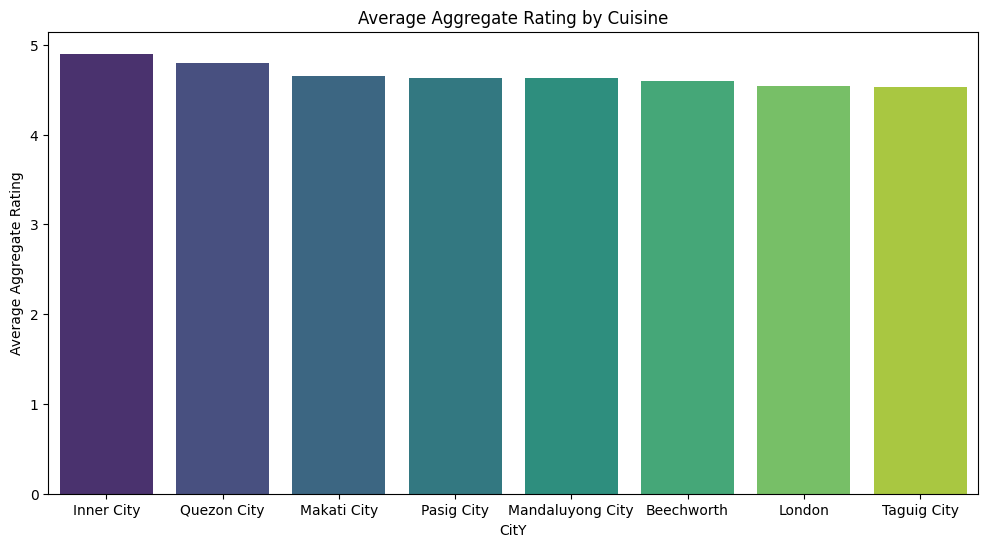

In [ ]:
# Grouping and sorting
df['City'].str.split(',').explode().str.strip()
cuisine_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(8)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_ratings.index, y=cuisine_ratings.values, palette='viridis')

plt.xlabel("CitY")
plt.ylabel("Average Aggregate Rating")
plt.title("Average Aggregate Rating by Cuisine")

plt.show()

In [ ]:
# top 10  cities
df['City'].value_counts().head(10)

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
Bhubaneshwar,21
Amritsar,21
Ahmedabad,21
Lucknow,21


In [ ]:
#checking for skewness and inbalance for numerical columns
# before applying the sqrt
for col in num_cols:
    skewness = df[col].skew()
    print(f'{col} \n Skew = {skewness}')

Restaurant ID 
 Skew = 0.061569976479250714
Country Code 
 Skew = 3.043965346403779
Longitude 
 Skew = -2.8073278338140857
Latitude 
 Skew = -3.08163535060857
Average Cost for two 
 Skew = 35.477914900871276
Price range 
 Skew = 0.8896175931442
Aggregate rating 
 Skew = -0.9541304733200109
Votes 
 Skew = 8.807636687709472


In [ ]:
# applying the sqrt
df = df[num_cols].apply(np.sqrt)
for col in num_cols:
    skewness = df[col].skew()
    print(f'{col} \n Skew = {skewness}')

Restaurant ID 
 Skew = -0.45153449211392427
Country Code 
 Skew = 2.876220885725145
Longitude 
 Skew = -3.850902293935728
Latitude 
 Skew = -3.905378684032424
Average Cost for two 
 Skew = 0.5551478206682154
Price range 
 Skew = 0.39449031438135396
Aggregate rating 
 Skew = -1.311505867610072
Votes 
 Skew = -0.9808291261773346


In [ ]:
# The dataset has 9551 columns and 21 rows
# its has 9 missing values, all from cuisine (which i replaced with the mode of the column)
# There are 8 numerical columns and 13 categorical columns
# All columns are in a correct data type (no need for converion)
# For the descriptive statistics for the numerical columns, columns "Average cost for two" has a huge discrepency, it has a min of 0 and 800k which suspicious
# For the descriptive statistics for the categorical columns,(count,	unique ,	top , freq)
# For the "Cuisines" column, there is a problem of some cuisines not been separted and are counted as 1, which is a properly in our analysis
# I corrected the blunder buy the ".str.split(',').explode().str.strip()", and then count the top 10 and the top then cities
# For the skewness and outlier detections; Variables like Country Code, Average Cost for Two, and Votes have a strong positive skew, meaning a small number of values are much larger than the rest.
# Latitude and Longitude have a strong negative skew, suggesting a concentration of data points in certain locations.
# Aggregate Rating and Price Range have mild skewness, indicating slight asymmetry but not extreme.
# Restaurant ID is nearly symmetrical.
# For the outliers i decided to use sqrt to minimise there effect, idk whether to remove them or not. i applied on the numerical columns
# want to hear your views



